In [1]:
%load_ext autoreload
%autoreload 2

from ml4a import image
from ml4a.utils import face
from ml4a.models import idinvert

Display aligned face


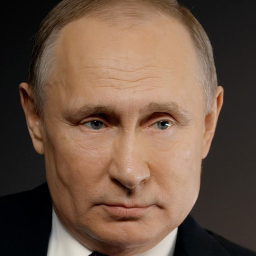

In [2]:
img = image.load_image('https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Vladimir_Putin_%282020-02-20%29.jpg/1200px-Vladimir_Putin_%282020-02-20%29.jpg')
target_image, face_found = face.align_face(img, face_width=idinvert.resolution)
image.display(target_image, title="Display aligned face")


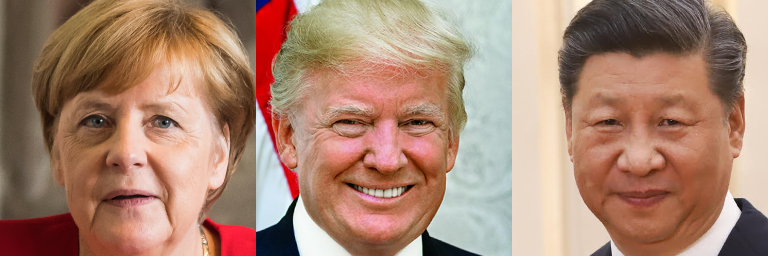

In [3]:
context_paths = [
    'https://upload.wikimedia.org/wikipedia/commons/a/a8/Angela_Merkel_2019_%28cropped%29.jpg',
    'https://bookstore.gpo.gov/sites/default/files/styles/product_page_image/public/covers/potus2_0.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/3/32/Xi_Jinping_2019.jpg'    
]

context_images = []
for path in context_paths:
    img = image.load_image(path)
    aligned_face, face_found = face.align_face(img, face_width=idinvert.resolution)
    if face_found:
        context_images.append(aligned_face)

image.display(context_images)

[2020-11-16 18:50:24,887][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2020-11-16 18:50:25,033][INFO] Loading pytorch weights from `/home/bzion/.ml4a/models/idinvert_pytorch/pretrained/styleganinv_ffhq256_generator.pth`.
[2020-11-16 18:50:25,350][INFO] Successfully loaded!
[2020-11-16 18:50:27,099][INFO] Current `lod` is 0.0.
[2020-11-16 18:50:27,100][INFO] Build network for module `encoder` in model `styleganinv_ffhq256`.
[2020-11-16 18:50:27,947][INFO] Loading pytorch weights from `/home/bzion/.ml4a/models/idinvert_pytorch/pretrained/styleganinv_ffhq256_encoder.pth`.
[2020-11-16 18:50:29,817][INFO] Successfully loaded!


loss_pix: 0.005, loss_feat: 285.205, loss: 0.019: 100%|██████████| 100/100 [00:14<00:00,  7.07it/s]

superimposed images


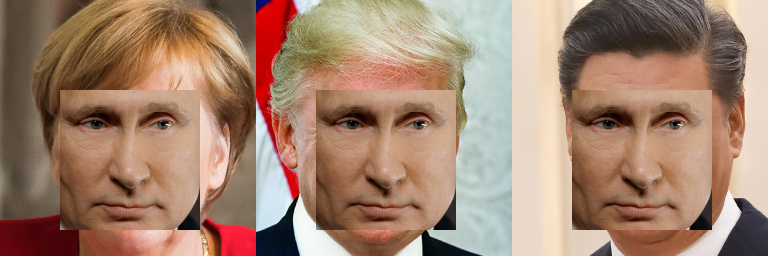

diffused images


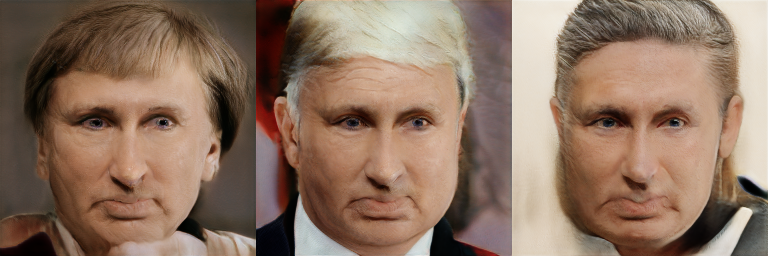

In [4]:
showed_fuses, diffused_images = idinvert.fuse('styleganinv_ffhq256', 
                                              context_images, target_image, 
                                              crop_size=140, center_x=130, center_y=160)
image.display(showed_fuses, title="superimposed images")
image.display(diffused_images, title="diffused images")

In [6]:
latent_code = idinvert.invert('styleganinv_ffhq256', target_image, redo=False, save=False)

[2020-11-10 18:42:48,520][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2020-11-10 18:42:48,648][INFO] Loading pytorch weights from `/home/bzion/.ml4a/models/idinvert_pytorch/pretrained/styleganinv_ffhq256_generator.pth`.
[2020-11-10 18:42:48,768][INFO] Successfully loaded!
[2020-11-10 18:42:48,815][INFO] Current `lod` is 0.0.
[2020-11-10 18:42:48,816][INFO] Build network for module `encoder` in model `styleganinv_ffhq256`.
[2020-11-10 18:42:49,620][INFO] Loading pytorch weights from `/home/bzion/.ml4a/models/idinvert_pytorch/pretrained/styleganinv_ffhq256_encoder.pth`.
[2020-11-10 18:42:50,478][INFO] Successfully loaded!


loss_pix: 0.036, loss_feat: 3385.472, loss_reg: 0.041, loss: 0.288:   2%|▏         | 2/100 [00:00<00:08, 12.16it/s]

optimizing latent_code to reconstruct target image...


loss_pix: 0.011, loss_feat: 1175.878, loss_reg: 0.009, loss: 0.089: 100%|██████████| 100/100 [00:08<00:00, 11.91it/s]


[2020-11-10 18:42:59,184][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2020-11-10 18:42:59,321][INFO] Loading pytorch weights from `/home/bzion/.ml4a/models/idinvert_pytorch/pretrained/styleganinv_ffhq256_generator.pth`.
[2020-11-10 18:42:59,430][INFO] Successfully loaded!
[2020-11-10 18:42:59,461][INFO] Current `lod` is 0.0.


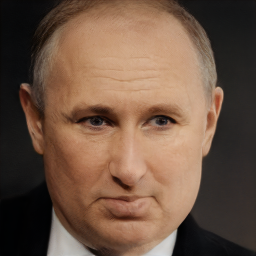

In [7]:
reconstruction = idinvert.generate('styleganinv_ffhq256', latent_code)
image.display(reconstruction)

original and reconstruction


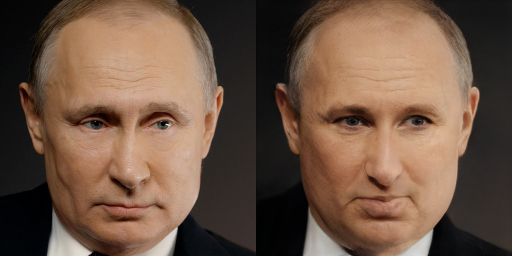

young, eyeglasses, female, turn_right, smile


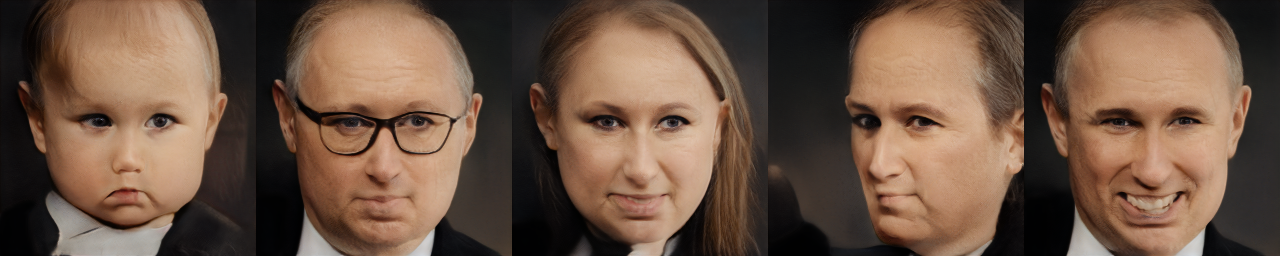

In [8]:
reconstruction_age = idinvert.generate('styleganinv_ffhq256', idinvert.age(latent_code, -2.5))
reconstruction_eyeglasses = idinvert.generate('styleganinv_ffhq256', idinvert.eyeglasses(latent_code, +2.5))
reconstruction_gender = idinvert.generate('styleganinv_ffhq256', idinvert.gender(latent_code, -2.5))
reconstruction_pose = idinvert.generate('styleganinv_ffhq256', idinvert.pose(latent_code, +2.5))
reconstruction_expression = idinvert.generate('styleganinv_ffhq256', idinvert.expression(latent_code, +2.5))

image.display([
    target_image, 
    reconstruction[0]], title="original and reconstruction")

image.display([
    reconstruction_age[0], 
    reconstruction_eyeglasses[0],
    reconstruction_gender[0],
    reconstruction_pose[0],
    reconstruction_expression[0]], 
    title="young, eyeglasses, female, turn_right, smile", num_cols=5)

In [9]:
import numpy as np

frames = [idinvert.generate('styleganinv_ffhq256', idinvert.age(latent_code, r))[0] 
          for r in np.linspace(-2.5, +2.5, 100)]
image.display(frames, animate=True, title="Age range")

In [10]:
frames = [idinvert.generate('styleganinv_ffhq256', idinvert.expression(latent_code, r))[0] 
          for r in np.linspace(-3.0, +3.0, 100)]
image.display(frames, animate=True, title="Expression range")